In [1]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

C:\Users\Anant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## business problem 1

In [18]:
df1 = pd.read_csv("LoansData.csv")

In [25]:
df1.head(5)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [21]:
df1["Interest.Rate"] = df1["Interest.Rate"].apply(lambda x:str(x).replace('%',""))

In [23]:
df1["Interest.Rate"] = df1["Interest.Rate"].astype('float64')

In [24]:
df1["Interest.Rate"].corr(df1["Amount.Funded.By.Investors"])

0.3374540043675967

as the correlation vale is positive we can say that as the loan amount increase then interest rate also increases

In [33]:
cat1 = df1.loc[df1["Loan.Length"] == "36 months","Interest.Rate"].dropna()
cat2 = df1.loc[df1["Loan.Length"] == "60 months","Interest.Rate"].dropna()

In [34]:
import scipy.stats as stats

In [113]:
cat1.mean()

12.126179487179487

In [114]:
cat2.mean()

16.407463503649634

In [35]:
stats.ttest_ind(a=cat1,b=cat2,equal_var=True)

Ttest_indResult(statistic=-23.404324256626744, pvalue=1.0952664487978044e-109)

as the p value is less than is 0.05 we reject null hypothesis. therefore there is difference between interest rates so the loan length is effecting interest rate

In [60]:
df1.groupby("Loan.Purpose")["Interest.Rate"].mean()

Loan.Purpose
car                   11.113000
credit_card           13.050655
debt_consolidation    13.586917
educational           11.007333
home_improvement      11.594276
house                 13.448000
major_purchase        10.797822
medical               11.649667
moving                13.621034
other                 13.159552
renewable_energy       9.877500
small_business        12.839195
vacation              11.966190
wedding               12.047105
Name: Interest.Rate, dtype: float64

In [63]:
g1 = df1.loc[df1["Loan.Purpose"] == "debt_consolidation","Interest.Rate"].dropna()
g2 = df1.loc[df1["Loan.Purpose"] == "credit_card","Interest.Rate"].dropna()
g3 = df1.loc[df1["Loan.Purpose"] == "other","Interest.Rate"].dropna()
g4 = df1.loc[df1["Loan.Purpose"] == "moving","Interest.Rate"].dropna()
g5 = df1.loc[df1["Loan.Purpose"] == "car","Interest.Rate"].dropna()
g6 = df1.loc[df1["Loan.Purpose"] == "vacation","Interest.Rate"].dropna()
g7 = df1.loc[df1["Loan.Purpose"] == "home_improvement","Interest.Rate"].dropna()
g8 = df1.loc[df1["Loan.Purpose"] == "house","Interest.Rate"].dropna()
g9 = df1.loc[df1["Loan.Purpose"] == "major_purchase","Interest.Rate"].dropna()
g10 = df1.loc[df1["Loan.Purpose"] == "educational","Interest.Rate"].dropna()
g11 = df1.loc[df1["Loan.Purpose"] == "medical","Interest.Rate"].dropna()
g12 = df1.loc[df1["Loan.Purpose"] == "wedding","Interest.Rate"].dropna()
g13 = df1.loc[df1["Loan.Purpose"] == "small_business","Interest.Rate"].dropna()
g14 = df1.loc[df1["Loan.Purpose"] == "renewable_energy","Interest.Rate"].dropna()

In [64]:
stats.f_oneway(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14)

F_onewayResult(statistic=7.481404351302254, pvalue=1.1686298123677374e-14)

as the p value is less than 0.05 we reject null hypothesis. therefore loan purpose effects the interest rate of the loan.

In [65]:
df1["Home.Ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', nan], dtype=object)

In [79]:
df1[['l','h']]=df1["FICO.Range"].str.split('-',expand=True)

In [87]:
df1['l']=df1['l'].dropna().astype('int32')
df1['h']=df1['h'].dropna().astype('int32')

In [88]:
df1["fr"] = (df1.l+df1.h)/2

In [89]:
gh1 = df1.loc[df1["Home.Ownership"]=="MORTGAGE","fr"].dropna()
gh2 = df1.loc[df1["Home.Ownership"]=="RENT","fr"].dropna()
gh3 = df1.loc[df1["Home.Ownership"]=="OWN","fr"].dropna()
gh4 = df1.loc[df1["Home.Ownership"]=="OTHER","fr"].dropna()
gh5 = df1.loc[df1["Home.Ownership"]=="NONE","fr"].dropna()

In [90]:
stats.f_oneway(gh1,gh2,gh3,gh4,gh5)

F_onewayResult(statistic=19.334591709631045, pvalue=1.114378111228758e-15)

as the p value is less than 0.05 we reject null hypothesis. therefore home ownership  effects fico range.

## business probelm2

In [91]:
df2 = pd.read_csv("Price_Quotes.csv")

In [101]:
df2["diff"] = df2["Barry_Price"] - df2["Mary_Price"]

In [102]:
df2["diff"].mean()

9.583333333333334

In [93]:
df2["Barry_Price"].mean()

124.33333333333333

In [94]:
df2["Mary_Price"].mean()

114.75

In [95]:
stats.ttest_ind(a=df2["Mary_Price"],b=df2["Barry_Price"],equal_var=True)

Ttest_indResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285)

as the p value is greater than 0.05 we fail to reject the null hypothesis. therefore we can say that there is no significant difference between the avergae price quotes provided by barry and mary

## busniess probelm3

In [97]:
df3 = pd.read_csv("Treatment_Facility.csv")

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [100]:
df3.head(5)

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [105]:
df3.Reengineer.unique()

array(['Prior', 'Post'], dtype=object)

In [107]:
ct1=df3.loc[df3["Reengineer"]=="Prior","VAR5"].dropna()
ct2=df3.loc[df3["Reengineer"]=="Post","VAR5"].dropna()

In [109]:
ct1.mean()

53.887906321846145

In [125]:
ct1.var()

2371.2562805270313

In [126]:
ct2.var()

60.967692818277094

In [110]:
ct2.mean()

23.34971927988571

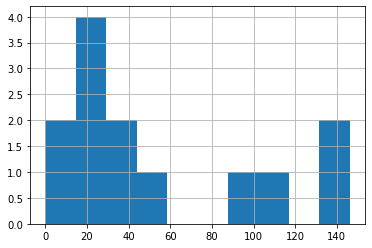

In [122]:
ct1.hist()

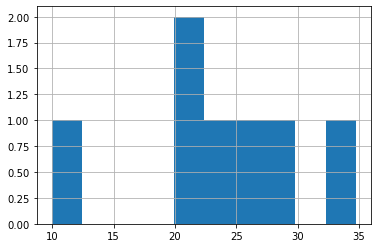

In [123]:
ct2.hist()

In [124]:
stats.levene(ct1,ct2)

LeveneResult(statistic=4.1167822200189494, pvalue=0.05751543806297124)

In [127]:
stats.ttest_ind(a=ct1,b=ct2,equal_var=False)

Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193176)

as the p value is less than 0.05 we reject null hypothesis. therefore the reengineering had effect on critical incidence rate

## business probelm 4

In [129]:
df4 = pd.read_csv("Priority_Assessment.csv")

In [130]:
df4

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [131]:
df4.groupby("Priority").mean()

,Days
Priority,
High,3.023620
Low,4.228358
Medium,2.500000


as you can see on an average it took more number of days to complete high than medium. and medium took less than low .

In [133]:
g1 = df4.loc[df4["Priority"]=="Low","Days"].dropna()
g2 = df4.loc[df4["Priority"]=="Medium","Days"].dropna()
g3 = df4.loc[df4["Priority"]=="High","Days"].dropna()

In [134]:
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=1.8123110100760724, pvalue=0.16411459461716182)

as the p value is greater than 0.05 we fail to reject null hyptothesis indicates that the number days taken is not significantly different for different priorities

## business probelm 5

In [163]:
df5 = pd.read_csv("Films.csv")

In [164]:
df5.head(5)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [165]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [166]:
df5["Overall"].mean()

1.6189024390243902

the overall customer service experience is between excellent and good

In [167]:
df5["Gender"].replace({'1':"Male",'2':"Female"},inplace=True)

In [168]:
df5.groupby("Gender")["Movie"].count()

Gender
Female    213
Male      117
Name: Movie, dtype: int64

In [171]:
df5["Marital_Status"].replace({'1':"Married",'2':"Single",'Slngle':'Single'},inplace=True)

In [172]:
df5.groupby("Marital_Status")["Movie"].count()

Marital_Status
Married    100
Single     228
Name: Movie, dtype: int64

In [177]:
df5.groupby("Age")["Movie"].count()

Age
1.0     26
2.0    175
3.0    117
4.0     10
Name: Movie, dtype: int64

In [183]:
df5.groupby("Income")["Movie"].count()

Income
1.0    142
2.0     82
3.0     90
Name: Movie, dtype: int64

In [182]:
df5.groupby("Hear_About")["Movie"].count().sort_values()

Hear_About
1,5      1
3,5      1
4,5      1
5,4      1
2,5      2
3,4      2
2       12
3       14
1       22
4       41
5      226
Name: Movie, dtype: int64

should advertise on website and may be in radio as well. but as we can see that the best is word of mouth.